In [1]:
import tensorflow as tf 


In [2]:
import keras


Using TensorFlow backend.


In [3]:
import numpy as np

In [4]:
w = tf.Variable(tf.random_normal([3, 2,]), name='w')
b = tf.Variable(tf.random_normal([1, 2]), name='b')
X = tf.placeholder("float", [None, 3], name='X')
y = tf.nn.sigmoid(tf.matmul(X,w)+b, 'y')

In [5]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    X_array = np.array([[0.4, 0.2, 0.4], 
                        [0.3, 0.4, 0.5], 
                        [0.3, -0.4, 0.5]])
    (_b, _w, _X, _y)=sess.run((b, w, X, y),
                              feed_dict={X:X_array})

In [6]:
y

<tf.Tensor 'y:0' shape=(?, 2) dtype=float32>

In [7]:
model = Sequential()

NameError: name 'Sequential' is not defined

In [8]:
tf.__version__


'1.3.0'

In [9]:
keras.__version__

'2.1.5'

In [10]:
import numpy as np


In [11]:
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)

In [12]:
from keras.datasets import mnist

In [13]:
(X_train_image, y_train_label),\
(X_test_image, y_test_label) = mnist.load_data()

In [14]:
print('train data', len(X_train_image))
print("test data = ", len(X_test_image))

train data 60000
test data =  10000


In [15]:
print('x_train_image:', X_train_image.shape)
print('y_train_label', y_train_label.shape)

x_train_image: (60000, 28, 28)
y_train_label (60000,)


In [16]:
import matplotlib.pyplot as plt
#from matplotlib import pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2,2)
    plt.imshow(image, cmap='binary')
    plt.show()

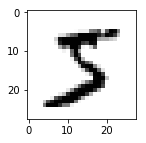

In [17]:
plot_image(X_train_image[0])

In [18]:
y_train_label[0]

5

In [19]:
def plot_images_labels_prediction(images, labels,
                                 prediction, idx, num=10):

    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num > 25 : num = 25
        
    for i in range(0, num):
        ax=plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title = "label" + str(labels[idx])
        if len(prediction) > 0:
            title+=',predict=' + str(prediction[idx])
            
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]); ax.set_yticks([])

        idx += 1
    plt.show()
    

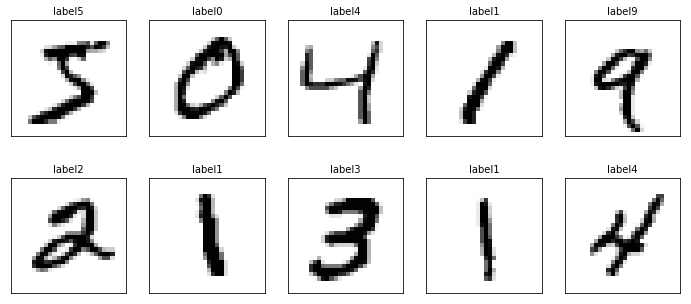

In [20]:
plot_images_labels_prediction(X_train_image, y_train_label, [], 0, 10)

In [21]:
print('X_test_image:', X_test_image.shape)
print('y_test_iamge:', y_test_label.shape)

X_test_image: (10000, 28, 28)
y_test_iamge: (10000,)


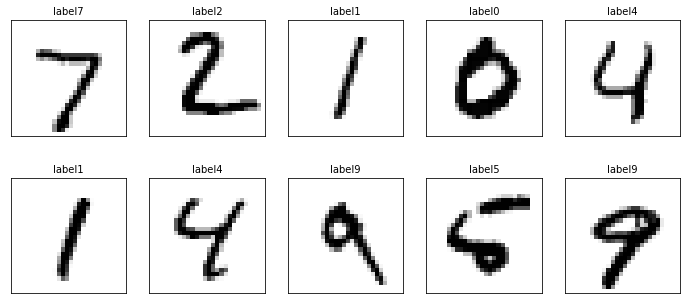

In [22]:
plot_images_labels_prediction(X_test_image, y_test_label, [], 0, 10)

## Multilayer Preceptron 
### features pre-processing 

In [23]:
def print_data_shape(X_image, Y_image):
    
    print('X_train_image', X_image.shape)
    print('Y_iamge', Y_image.shape)

In [24]:
print_data_shape(X_train_image, y_train_label)

X_train_image (60000, 28, 28)
Y_iamge (60000,)


### data processing and cleaning 
*  we need to convert 28*28 dimension digit-image to 1 dimesion vector
* Using reshape to do it 

In [25]:
x_Train = X_train_image.reshape(60000, 784).astype('float32')
x_Test = X_test_image.reshape(10000, 784).astype('float32')

In [26]:
print_data_shape(x_Train, x_Test)

X_train_image (60000, 784)
Y_iamge (10000, 784)


In [27]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255 

In [41]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [28]:
# label Pre-Processing 

In [29]:
y_train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [30]:
y_TrainOneHot = np_utils.to_categorical(y_train_label)
Y_TestOneHot = np_utils.to_categorical(y_test_label)

In [31]:
#Keras handwriting-digit recognition 

#### How to figure out the number of hiddent layer ?

## Establishing Model 

In [32]:
from keras.models import Sequential 
from keras.layers import Dense

In [33]:
model = Sequential()

In [34]:
model.add(Dense(units=256,
               input_dim=784,
               kernel_initializer='normal',
               activation='relu'))


In [35]:
model.add(Dense(units=10,
               kernel_initializer='normal', 
               activation='softmax'))



In [36]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [42]:
train_history = model.fit(x = x_Train_normalize,
                         y = y_Train_OneHot, validation_split=0.2,
                         epochs=10, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 31s - loss: 0.4383 - acc: 0.8829 - val_loss: 0.2189 - val_acc: 0.9408
Epoch 2/10
 - 26s - loss: 0.1919 - acc: 0.9455 - val_loss: 0.1560 - val_acc: 0.9552
Epoch 3/10
 - 25s - loss: 0.1363 - acc: 0.9615 - val_loss: 0.1261 - val_acc: 0.9645
Epoch 4/10
 - 26s - loss: 0.1034 - acc: 0.9701 - val_loss: 0.1122 - val_acc: 0.9675
Epoch 5/10
 - 27s - loss: 0.0817 - acc: 0.9772 - val_loss: 0.0986 - val_acc: 0.9715
Epoch 6/10
 - 25s - loss: 0.0668 - acc: 0.9813 - val_loss: 0.0936 - val_acc: 0.9718
Epoch 7/10
 - 26s - loss: 0.0551 - acc: 0.9850 - val_loss: 0.0911 - val_acc: 0.9737
Epoch 8/10
 - 26s - loss: 0.0466 - acc: 0.9871 - val_loss: 0.0828 - val_acc: 0.9758
Epoch 9/10
 - 26s - loss: 0.0387 - acc: 0.9896 - val_loss: 0.0822 - val_acc: 0.9761
Epoch 10/10
 - 25s - loss: 0.0324 - acc: 0.9914 - val_loss: 0.0804 - val_acc: 0.9754


In [48]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

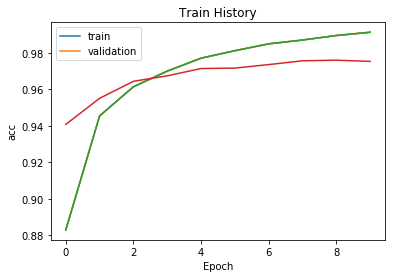

In [49]:
show_train_history(train_history, 'acc', 'val_acc')

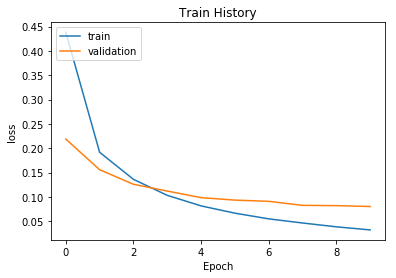

In [51]:
show_train_history(train_history, 'loss', 'val_loss')

In [52]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=', scores[1])

10000/10000 [==============================] - 12s 1ms/step

accuracy= 0.9761


In [53]:
prediction = model.predict_classes(x_Test)

In [54]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

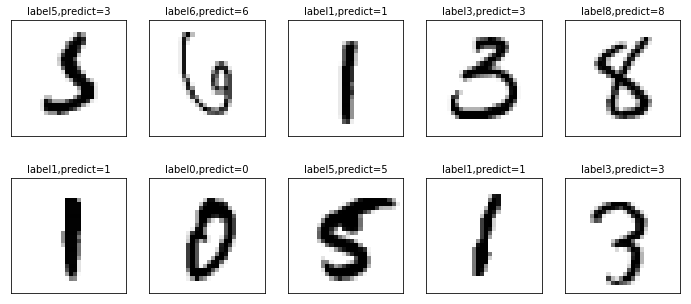

In [57]:
plot_images_labels_prediction(X_test_image, y_test_label,
                             prediction, idx=340)

# Confusion Matrix
* error matrix

In [58]:
import pandas as pd

In [60]:
pd.crosstab(y_test_label, prediction,
             rownames=['label'], colnames = ['predicti'])

predicti,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,1,1,0,2,1,3,0
1,0,1124,4,0,0,1,2,0,4,0
2,6,0,1009,2,1,0,2,5,7,0
3,0,0,3,994,0,0,0,3,6,4
4,2,0,4,1,961,0,3,0,3,8
5,3,0,0,18,1,849,7,2,9,3
6,5,3,2,1,4,3,938,0,2,0
7,0,5,13,7,1,0,0,988,5,9
8,5,0,3,6,2,1,1,2,953,1


In [62]:
df = pd.DataFrame({'label': y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [64]:
df[(df.label == 5) & (df.predict == 3)].head(10)

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
3117,5,3
3902,5,3
4255,5,3


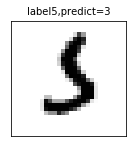

In [67]:
plot_images_labels_prediction(X_test_image, y_test_label,
                                         prediction, idx=340, num=1)

In [68]:
model = Sequential()

In [72]:
model.add(Dense(units=1000, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='softmax'))

In [92]:
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))


In [93]:
print (model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               100100    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 886,110
Trainable params: 886,110
Non-trainable params: 0
_________________________________________________________________
None


In [95]:
train_history = model.fit(x=x_Train_normalize, 
                          y=y_Train_OneHot, validation_split=0.2,
                           epochs=10, batch_size=200, verbose=2)

RuntimeError: The model needs to be compiled before being used.

In [96]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [97]:
train_history=model.fit(x=x_Train_normalize, 
                        y=y_Train_OneHot, validation_split=0.2,
                        epochs=10, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 87s - loss: 2.2981 - acc: 0.1130 - val_loss: 2.2824 - val_acc: 0.1060
Epoch 2/10
 - 85s - loss: 2.1953 - acc: 0.3416 - val_loss: 2.0695 - val_acc: 0.5682
Epoch 3/10
 - 84s - loss: 1.9125 - acc: 0.5780 - val_loss: 1.7406 - val_acc: 0.5758
Epoch 4/10
 - 85s - loss: 1.5755 - acc: 0.5798 - val_loss: 1.4060 - val_acc: 0.5769
Epoch 5/10
 - 85s - loss: 1.2868 - acc: 0.5926 - val_loss: 1.1751 - val_acc: 0.6252
Epoch 6/10
 - 90s - loss: 1.1121 - acc: 0.6005 - val_loss: 1.0437 - val_acc: 0.6027
Epoch 7/10
 - 88s - loss: 1.0077 - acc: 0.6039 - val_loss: 0.9664 - val_acc: 0.6118
Epoch 8/10
 - 92s - loss: 0.9460 - acc: 0.6103 - val_loss: 0.9233 - val_acc: 0.6295
Epoch 9/10
 - 104s - loss: 0.9056 - acc: 0.6177 - val_loss: 0.8881 - val_acc: 0.6204
Epoch 10/10
 - 105s - loss: 0.8765 - acc: 0.6244 - val_loss: 0.8642 - val_acc: 0.6298


In [87]:
y_Train_OneHot.shape


(60000, 10)

In [89]:
x_Train_normalize.shape

(60000, 784)

In [91]:
yy_train_label.shape

(60000,)

In [98]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=', scores[1])

10000/10000 [==============================] - 29s 3ms/step

accuracy= 0.6232


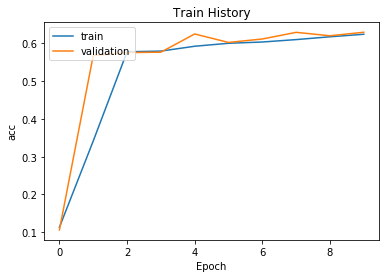

In [99]:
show_train_history(train_history, 'acc', 'val_acc')